## Exploring the Law of Large Numbers with python

In [101]:
import matplotlib.pyplot as plt
import numpy as np

In [102]:
# simulation parameters
population_size = 2.3e5
sample_size = 50
number_of_samples = 500


### Generating population of numbers (1/f distribution)

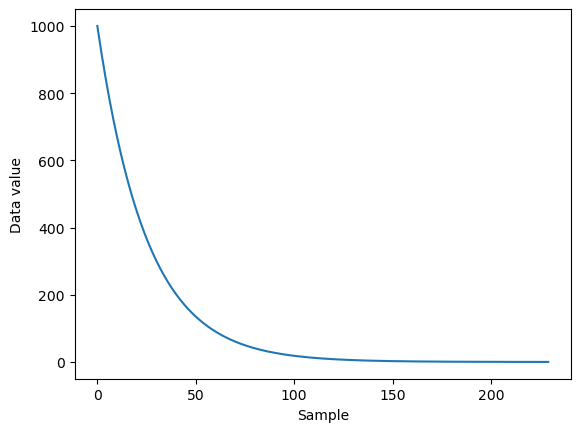

In [103]:
population = 1/np.logspace(np.log10(0.001),np.log10(10),int(population_size))

skip = int(1e3)
plt.plot(population[::skip])
plt.xlabel('Sample')
plt.ylabel('Data value')
plt.show()

### Shuffling

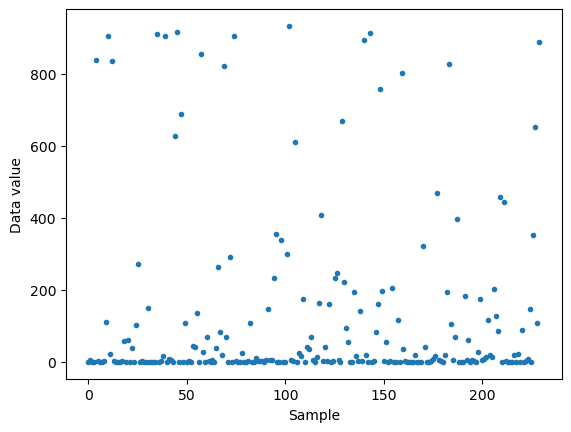

In [104]:
np.random.shuffle(population)

skip = int(1e3)
plt.plot(population[::skip], '.')
plt.xlabel('Sample')
plt.ylabel('Data value')
plt.show()

###

### Mean 

In [105]:
# true mean 
true_mean = np.mean(population)
true_mean

108.56446524669427

In [106]:
samplemeans = np.zeros(number_of_samples)

for i in range(number_of_samples):
    rand_sample = np.random.choice(population, size=sample_size)
    samplemeans[i] = np.mean(rand_sample)

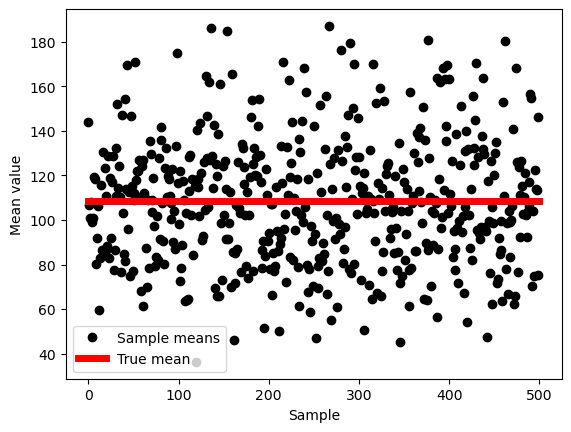

In [107]:
plt.plot(samplemeans, 'ko', label='Sample means')
plt.plot([0, number_of_samples], [true_mean, true_mean], 'r', linewidth=5, label="True mean")
plt.xlabel("Sample")
plt.ylabel("Mean value")
plt.legend()
plt.show()

#### Computing cumulative average

##### With a loop

In [108]:
cumulative = np.zeros(number_of_samples)
for i in range(number_of_samples):
    cumulative[i] = np.mean(samplemeans[:i+1])

##### With cumsum / arange

In [109]:
cumave2 = np.cumsum(samplemeans) / np.arange(1, number_of_samples+1)

In [110]:
# test to see if they're the same
np.average(np.round(cumulative - cumave2, 2))

0.0

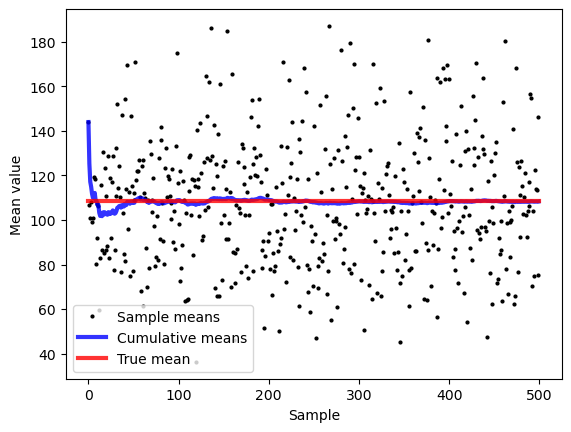

In [111]:
plt.plot(samplemeans, 'ko', markersize=2, label='Sample means')
plt.plot(cumulative, 'b',linewidth=3, alpha=0.8, label='Cumulative means')
plt.plot([0, number_of_samples], [true_mean, true_mean], 
         'r', linewidth=3, alpha=0.8, label="True mean")
plt.xlabel("Sample")
plt.ylabel("Mean value")
plt.legend()
plt.show()

### Computing divergence for Meta samples (repeated experiments as above)

In [128]:

number_of_meta_sample = 100

all_sample_means = np.zeros((number_of_meta_sample, number_of_samples))
cumaves = np.zeros((number_of_meta_sample, number_of_samples))

for metai in range(number_of_meta_sample):
    for i in range(number_of_samples):
        rand_sample = np.random.choice(population, size=sample_size)
        samplemeans[i] = np.mean(rand_sample)

    tmp = np.cumsum(samplemeans) / np.arange(1, number_of_samples+1)
    cumaves[metai, :] = (tmp-true_mean)**2

    all_sample_means[metai, :] = samplemeans


In [116]:
cumaves

array([[2.01662493e+03, 1.03347754e+03, 9.32572705e+02, ...,
        4.12967143e+00, 3.94840572e+00, 3.83489850e+00],
       [3.90565912e+03, 4.37408656e+03, 1.89492402e+03, ...,
        6.62722496e-01, 7.39916316e-01, 6.49002241e-01],
       [6.06142188e+02, 2.32524026e+02, 2.68639562e+02, ...,
        6.19035046e+00, 6.71783929e+00, 7.04022389e+00],
       ...,
       [1.52889209e+02, 5.83150285e+01, 1.95137777e+01, ...,
        2.41092364e+00, 2.42603969e+00, 2.44691341e+00],
       [5.12751239e+01, 1.01416914e+02, 1.93276698e+02, ...,
        2.67071567e+00, 2.52538686e+00, 2.41232930e+00],
       [1.04188156e+03, 3.14421022e+01, 2.61992673e+00, ...,
        4.93791879e-03, 8.22444859e-05, 2.01475980e-07]])

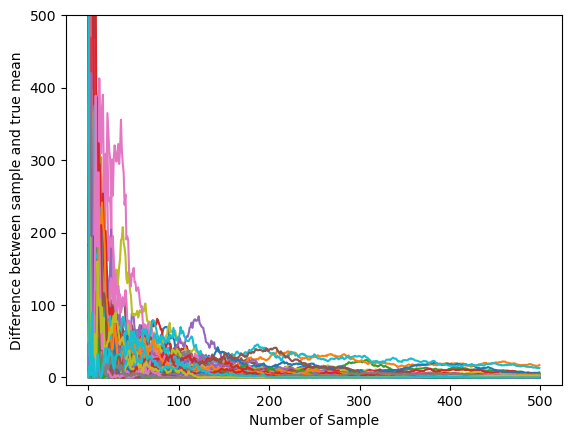

In [122]:
plt.plot(cumaves.T)
plt.ylim([-10, 500])
plt.ylabel("Difference between sample and true mean")
plt.xlabel("Number of Sample")
plt.show()

### Central Limit Theorem

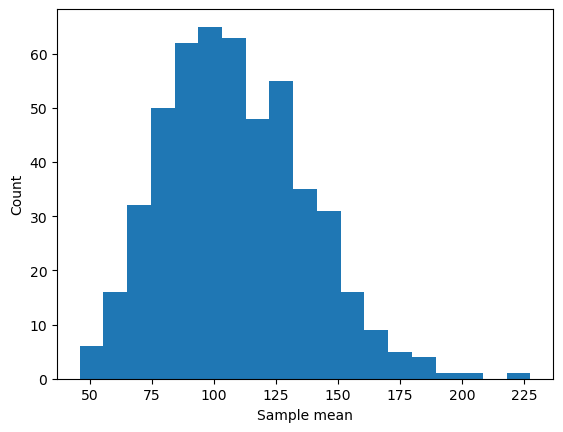

In [126]:
plt.hist(samplemeans, bins='fd') #friedman-diaconis 
plt.ylabel("Count")
plt.xlabel('Sample mean')
plt.show()

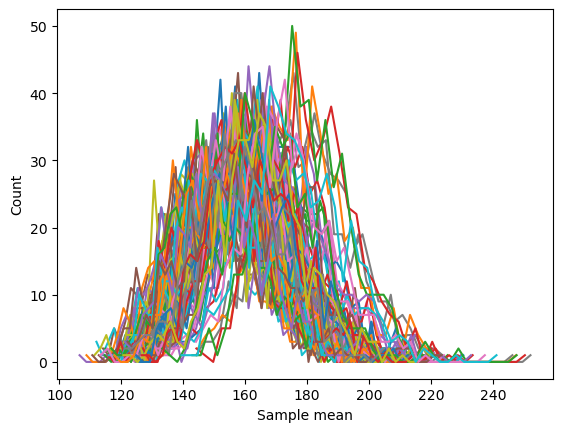

In [131]:
nbins = 40

for i in range(number_of_meta_sample):
    y,x = np.histogram(all_sample_means[i,:], bins=nbins)
    x = (x[1:]+x[-1])/2
    plt.plot(x,y)

plt.ylabel("Count")
plt.xlabel('Sample mean')
plt.show()